# **Item-item Collaborative Filtering**

---

RecSys Exercise 4

## **Overview**
In this exercise you  will explore item-based collaborative filtering.


***Please upload in Moodle this notebook (executable and in PDF) with the code and answers to the posted questions. ***

## **Instructions**

Before you start just to remind the intuitive algorithm of the item-item collaborative filtering:



1.   Compute similarity between pairs of items (cosine similarity).

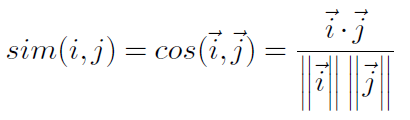
2.   Isolate the set of the most similar items based on the similarity measures.
(correlation values: 1, the most similar user to −1, the least similar user).
3. Compute the prediction score on an item *i* (that a user u has not rated) by adding the
ratings *r(i, j)* given by the user *u* on items similar to *i*. Each rating is weighted by the corresponding similarity *s(i, j)* between items *i* and *j*.

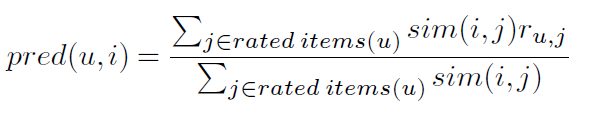
4. Recommend to the user the items with the highest prediction scores.



# **Task 1: Compute item-item similarity**

For this task please use the dataset named `movie_ratings.csv`. You can compare the dataset to a 20x20 matrix where columns represent
users, rows represent movies, and each cell represents a user-movie rating (a value of 0 means that
the user has not rated that movie). Note that the library `sklearn` is being used to compute the
cosine similarity between the items.

The code provided performs the computation of the cosine similarity between items. Note that
the function `cosine_similarity` returns a Numpy data type and therefore the output has been
converted to a `Pandas` data frame named `item_item_corr_matrix`. This variable contains the
similarity values between items.


In [2]:
#Exercise 4: Item-Item Filtering
#Authors: Al Amin Siddique

import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

import math

#**********************MAIN PROGRAM*******************************************************************
# read data
#
movie_ratings = pd.read_csv('movies_rating.csv', header=0, index_col='Movie')

print(movie_ratings)

#Calculating the cosine similarity across items. Note that the cosine_similarity function depends from the sklearn library
#As the cosine_similarity function returns an array, we create a new data frame and assign the names to columns and rows
#which come from the original dataframe

name_movies= list(movie_ratings.index)

item_item_corr_matrix= pd.DataFrame(cosine_similarity(movie_ratings), columns=name_movies, index=name_movies)
print("\nSimilarity Matrx: \n")
print(item_item_corr_matrix)



                                                   Pedro  Pablo  Arianna  \
Movie                                                                      
Toy Story (1995)                                       2      1        0   
Star Wars: Episode VI - Return of the Jedi (1983)      5      0        0   
 Forrest Gump (1994)                                   2      0        0   
Shawshank Redemption, The (1994)                       0      2        5   
Silence of the Lambs, The (1991)                       4      4        2   
Gladiator (2000)                                       4      2        0   
Star Wars: Episode IV - A New Hope (1977)              1      5        0   
Saving Private Ryan (1998)                             2      0        0   
Pulp Fiction (1994)                                    0      0        0   
Stand by Me (1986)                                     3      4        1   
Shakespeare in Love (1998)                             2      3        0   
Total Recall

**Provide the title of the five (5) most similar movies to Toy Story, in decreasing order of similarity.**

In [3]:
#Write your code here

# Get similarity scores for Toy Story (1995)
toy_story_similarities = item_item_corr_matrix['Toy Story (1995)']

# Sort by similarity (descending) and exclude the movie itself
similar_movies = toy_story_similarities.drop('Toy Story (1995)').sort_values(ascending=False)

# Display top 5 most similar movies
print("\nTop 5 most similar movies to 'Toy Story (1995)':")
print(similar_movies.head(5))


Top 5 most similar movies to 'Toy Story (1995)':
Star Wars: Episode IV - A New Hope (1977)    0.747409
Independence Day (ID4) (1996)                0.690665
Pulp Fiction (1994)                          0.667846
Shawshank Redemption, The (1994)             0.667424
Groundhog Day (1993)                         0.661016
Name: Toy Story (1995), dtype: float64


> *Answer:*



# **Task 2: Compute a prediction score for target itms**

Provide a prediction score for *all* the movies that user *Pablo* has not rated yet. To perform this task take into consideration the following:



*   The rating for a movie that the user has not rated is equal to zero (0).
*   You already have a similarity matrix with similarity values among the movies.
*  Refer to the step 3 of the Instructions section. There you will find the formula that you need to use to obtain the prediction scores on unrated items. For the sake of this exercise, you will not select the most similar items, you will have to use all the similarity values of all the rated items by the user.


**Hint:** The prediction score for the movie Star Wars: Episode VI - Return of the Jedi (1983) is of 2.774


In [5]:
# Get Pablo's ratings
pablo_ratings = movie_ratings['Pablo']

# Identify movies Pablo has not rated (rating = 0)
unrated_movies = pablo_ratings[pablo_ratings == 0].index

# Function to compute prediction score for a movie
def compute_prediction_score(movie, user_ratings, similarity_matrix):
    rated_movies = user_ratings[user_ratings != 0].index
    numerator = 0
    denominator = 0
    for rated_movie in rated_movies:
        similarity = similarity_matrix.loc[movie, rated_movie]
        rating = user_ratings[rated_movie]
        numerator += similarity * rating
        denominator += abs(similarity)
    if denominator == 0:
        return 0  # Avoid division by zero
    return numerator / denominator

# Compute prediction scores for all unrated movies
prediction_scores = {}
for movie in unrated_movies:
    score = compute_prediction_score(movie, pablo_ratings, item_item_corr_matrix)
    prediction_scores[movie] = score

# Print prediction scores
print("\nPrediction scores for movies not rated by Pablo:")
for movie, score in prediction_scores.items():
    print(f"{movie}: {score:.3f}")


Prediction scores for movies not rated by Pablo:
Star Wars: Episode VI - Return of the Jedi (1983): 2.774
 Forrest Gump (1994): 2.709
Saving Private Ryan (1998): 2.780
Pulp Fiction (1994): 2.803
Blade Runner (1982): 2.784
Matrix, The (1999): 2.770
Babe (1995): 2.611


> *Answer:*





# **Task 3: Answer the following**



* Using the prediction scores computed in *Task 2*, which movie will you recommend to the user Pablo?
> *Answer:* The highest prediction score is 2.803 for Pulp Fiction (1994). Therefore, the movie to recommend to Pablo is:

Pulp Fiction (1994).

* What are the main differences between User-User and Item-Item collaborative filtering?
> *Answer:*

**Focus of Similarity:**
User-User collaborative filtering identifies similarities between users based on their rating patterns across items, recommending items liked by similar users. In contrast, Item-Item collaborative filtering identifies similarities between items based on user ratings, recommending items similar to those the user has already rated.

**Scalability:**
User-User collaborative filtering uses a user-by-user similarity matrix, which can be large and less scalable in systems with many users. Item-Item collaborative filtering uses an item-by-item similarity matrix, which is typically smaller and more scalable since the number of items is usually less than the number of users.

**Cold Start:**
User-User similarities are less stable as user preferences change over time and struggle with new users (user cold start). Item-Item similarities are more stable due to fixed item characteristics but face challenges with new items (item cold start).

* Under which circumstances will you prefer Item-Item collaborative filtering over User-User collaborative filtering?
> *Answer:*

**Fewer Items Than Users:**
Item-Item collaborative filtering is preferred when the number of items is much smaller than the number of users, as it results in a smaller, more manageable similarity matrix, making computations more efficient.

**Stable Item Characteristics:**
When items have stable attributes (e.g., movie genres or product features that don’t change often), Item-Item collaborative filtering is more suitable because item similarities remain consistent, reducing the need for frequent updates.

**New Users:**
Item-Item collaborative filtering is better for systems with frequent new users, as it can provide recommendations based on item similarities as soon as the user rates one item, unlike User-User, which requires sufficient user ratings to find similar users.